# Combined labels for both cells and nuclei for breast_s1
# Version with late fusion PCA

In [1]:
slide_id = "breast_s1"

In [2]:
import pandas as pd
import scanpy as sc
import spatialdata as sd
import numpy as np
import anndata as ad
from spatialdata.models import get_table_keys
from matplotlib.colors import to_rgba
from functools import partial
from matplotlib import colors
import gc

## 1. Load the data

In [3]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('tables',))

cellid2transcript_cat = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'transcript_cat']].values)

cellid2nucleilabel = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'final_label']].values)
cellid2celllabel = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'final_label']].values)

cellid2nucleilabel1 = dict(sdata_final.tables['table_nuclei'].obs[['cell_id', 'label1']].values)
cellid2celllabel1 = dict(sdata_final.tables['table_cells'].obs[['cell_id', 'label1']].values)

del sdata_final
gc.collect()

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


1184

In [4]:
sdata_processed = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_{slide_id}.zarr", selection=('tables',))
sdata_processed

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'cell_labels', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/spatialdata/_core/spatialdata.py:158: UserWarning: The table is annotating 'nucleus_boundaries', which is not present in the SpatialData object.
  self.validate_table_in_spatialdata(v)


SpatialData object, with associated Zarr store: /Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_processed/sdata_breast_s1.zarr
└── Tables
      ├── 'table_cells': AnnData (892966, 280)
      └── 'table_nuclei': AnnData (892966, 541)
with coordinate systems:

with the following elements in the Zarr store but not in the SpatialData object:
    ▸ nucleus_boundaries (Shapes)
    ▸ morpho (Images)
    ▸ st (Points)
    ▸ he (Images)
    ▸ cell_boundaries (Shapes)

In [5]:
adata_nuclei_ini = sdata_processed.tables['table_nuclei'].copy()
adata_nuclei_ini

AnnData object with n_obs × n_vars = 892966 × 541
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram'
    uns: 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'spatial', 'tangram_pred'

In [6]:
adata_nuclei_ini.var

Empty DataFrame
Columns: []
Index: [ABCC11, ACTA2, ACTG2, ADAM9, ADGRE5, ADH1B, ADIPOQ, AGR3, AIF1, AKR1C1, AKR1C3, ALDH1A3, ANGPT2, ANKRD28, ANKRD29, ANKRD30A, APOBEC3A, APOBEC3B, APOC1, AQP1, AQP3, AR, AVPR1A, BACE2, BANK1, BASP1, BLANK_0006, BLANK_0011, BLANK_0013, BLANK_0027, BLANK_0030, BLANK_0037, BLANK_0055, BLANK_0069, BLANK_0072, BLANK_0075, BLANK_0087, BLANK_0097, BLANK_0110, BLANK_0114, BLANK_0119, BLANK_0120, BLANK_0122, BLANK_0128, BLANK_0130, BLANK_0146, BLANK_0147, BLANK_0163, BLANK_0165, BLANK_0180, BLANK_0181, BLANK_0186, BLANK_0189, BLANK_0212, BLANK_0218, BLANK_0221, BLANK_0223, BLANK_0230, BLANK_0231, BLANK_0237, BLANK_0250, BLANK_0253, BLANK_0272, BLANK_0273, BLANK_0278, BLANK_0287, BLANK_0294, BLANK_0298, BLANK_0303, BLANK_0310, BLANK_0311, BLANK_0318, BLANK_0319, BLANK_0321, BLANK_0337, BLANK_0344, BLANK_0350, BLANK_0351, BLANK_0352, BLANK_0353, BLANK_0354, BLANK_0355, BLANK_0356, BLANK_0357, BLANK_0358, BLANK_0359, BLANK_0360, BLANK_0361, BLANK_0362, BLANK_0363, BLANK_0364, BLANK_0365, BLANK_0366, BLANK_0367, BLANK_0368, BLANK_0369, BLANK_0370, BLANK_0371, BLANK_0372, BLANK_0373, ...]

[541 rows x 0 columns]

In [7]:
adata_cells_ini = sdata_processed.tables['table_cells'].copy()
adata_cells_ini

AnnData object with n_obs × n_vars = 892966 × 280
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatialdata_attrs'
    obsm: 'spatial'

In [8]:
adata_cells_ini.var

gene_ids    feature_types   genome
ABCC11  ENSG00000121270  Gene Expression  Unknown
ACTA2   ENSG00000107796  Gene Expression  Unknown
ACTG2   ENSG00000163017  Gene Expression  Unknown
ADAM9   ENSG00000168615  Gene Expression  Unknown
ADGRE5  ENSG00000123146  Gene Expression  Unknown
...                 ...              ...      ...
VWF     ENSG00000110799  Gene Expression  Unknown
WARS    ENSG00000140105  Gene Expression  Unknown
ZEB1    ENSG00000148516  Gene Expression  Unknown
ZEB2    ENSG00000169554  Gene Expression  Unknown
ZNF562  ENSG00000171466  Gene Expression  Unknown

[280 rows x 3 columns]

In [9]:
# Clean memory
del sdata_processed
gc.collect()

366

## 2. Get adata_nuclei and adata_cyto

In [10]:
adata_cells_ini = adata_cells_ini[adata_cells_ini.obs["transcript_counts"]>10].copy()  # Filter cells with less than 10 transcripts
len(adata_cells_ini.obs)

862045

In [11]:
# Align the cell_id in both AnnData objects
# Create a mapping of cell_id to index position in both objects
nuclei_idx = adata_nuclei_ini.obs.set_index('cell_id').index
cells_idx = adata_cells_ini.obs.set_index('cell_id').index

# Find the intersection of cell_id in both datasets
common_cells = nuclei_idx.intersection(cells_idx)
print(f"Number of common cell_ids: {len(common_cells)}")

# Subset both AnnData objects to include only common cell_ids
adata_nuclei = adata_nuclei_ini[adata_nuclei_ini.obs['cell_id'].isin(common_cells)]
adata_cells = adata_cells_ini[adata_cells_ini.obs['cell_id'].isin(common_cells)]

# Merge the 'obs' dataframes based on 'cell_id' to ensure the same order in both
obs_nuclei = adata_nuclei.obs[['cell_id']].reset_index(drop=True)
obs_cells = adata_cells.obs[['cell_id']].reset_index(drop=True)

# Ensure that both are in the same order
adata_nuclei = adata_nuclei[obs_nuclei['cell_id'].argsort().values]
adata_cells = adata_cells[obs_cells['cell_id'].argsort().values]

# Check that the cell_ids match now
assert np.array_equal(adata_nuclei.obs['cell_id'].values, adata_cells.obs['cell_id'].values), "Cell IDs do not match after alignment."

# Find common genes
common_genes = adata_nuclei.var_names.intersection(adata_cells.var_names)
print(f"Number of common genes: {len(common_genes)}")

# Subset both AnnData objects to include only the common genes
adata_nuclei = adata_nuclei[:, common_genes]
adata_cells = adata_cells[:, common_genes]

# Remove nucleus RNA from cell RNA to get the cytoplasmic RNA
X_cyto = adata_cells.X - adata_nuclei.X

# Because of slight mismatches or rounding, some entries might go negative by 1 or 2 in real data. So we clip to 0:
X_cyto.data = np.clip(X_cyto.data, a_min=0, a_max=None)

# Create a new AnnData object with the cytoplasmic RNA
adata_cyto = ad.AnnData(
    X=X_cyto,
    obs=adata_cells.obs.copy(),  # or adata_nuclei.obs, they should be the same set
    var=adata_cells.var.copy()   # same genes as well
)

Number of common cell_ids: 862045
Number of common genes: 280


In [12]:
adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)
adata_nuclei.obs

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_48973/547616959.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_nuclei.obs["transcript_counts"] = adata_nuclei.X.sum(axis=1)


region   slide     cell_id        area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1   29.508303   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1   28.244812   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1    7.202566   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1   50.282740   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1   56.647940   
...                        ...     ...         ...         ...   
aaankacb-1  nucleus_boundaries  morpho  aaankacb-1   16.167266   
aaankacc-1  nucleus_boundaries  morpho  aaankacc-1   35.423439   
aaankacd-1  nucleus_boundaries  morpho  aaankacd-1  127.343219   
aaankace-1  nucleus_boundaries  morpho  aaankace-1   10.049029   
aaankacf-1  nucleus_boundaries  morpho  aaankacf-1   28.922869   

                                        ct_tangram  transcript_counts  
aaaaaaaa-1                                Monocyte                 37  
aaaaaaab-1  CREB+MT1A+ vascular smooth muscle cell                 22  
aaaaaaac-1                           M1 macrophage                  6  
aaaaaaad-1      SCGB3A1 mammary luminal progenitor                 47  
aaaaaaae-1                       CCL19/21 pericyte                 42  
...                                            ...                ...  
aaankacb-1                          Dendritic cell                  7  
aaankacc-1                          Dendritic cell                  1  
aaankacd-1                KRT6B mammary basal cell                 61  
aaankace-1                          Dendritic cell                  5  
aaankacf-1                             Arterial EC                 13  

[862045 rows x 6 columns]

In [13]:
adata_cyto.obs["transcript_counts"] = adata_cyto.X.sum(axis=1).astype(int)
adata_cyto.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                 87                     0   
1       aaaaaaab-1                 45                     0   
2       aaaaaaac-1                 30                     0   
3       aaaaaaad-1                 50                     0   
4       aaaaaaae-1                 92                     0   
...            ...                ...                   ...   
892961  aaankacb-1                 10                     0   
892962  aaankacc-1                 41                     0   
892963  aaankacd-1                 48                     0   
892964  aaankace-1                 33                     0   
892965  aaankacf-1                 51                     0   

        control_codeword_counts  total_counts   cell_area  nucleus_area  \
0                             0           121  333.659531     32.331875   
1                             0            63  186.043750     30.390156   
2                             0            35   98.711562      8.489375   
3                             0            93  242.850313     52.652188   
4                             0           131  327.563438     63.173594   
...                         ...           ...         ...           ...   
892961                        0            16   41.950156     17.881875   
892962                        0            42  217.291875     37.931250   
892963                        0           105  222.755781    131.224063   
892964                        0            37   52.065156     11.108438   
892965                        0            64  194.713750     31.564219   

             region  
0       cell_labels  
1       cell_labels  
2       cell_labels  
3       cell_labels  
4       cell_labels  
...             ...  
892961  cell_labels  
892962  cell_labels  
892963  cell_labels  
892964  cell_labels  
892965  cell_labels  

[862045 rows x 8 columns]

In [14]:
adata_cells_ini.obs

cell_id  transcript_counts  control_probe_counts  \
0       aaaaaaaa-1                121                     0   
1       aaaaaaab-1                 63                     0   
2       aaaaaaac-1                 35                     0   
3       aaaaaaad-1                 93                     0   
4       aaaaaaae-1                131                     0   
...            ...                ...                   ...   
892961  aaankacb-1                 16                     0   
892962  aaankacc-1                 42                     0   
892963  aaankacd-1                105                     0   
892964  aaankace-1                 37                     0   
892965  aaankacf-1                 64                     0   

        control_codeword_counts  total_counts   cell_area  nucleus_area  \
0                             0           121  333.659531     32.331875   
1                             0            63  186.043750     30.390156   
2                             0            35   98.711562      8.489375   
3                             0            93  242.850313     52.652188   
4                             0           131  327.563438     63.173594   
...                         ...           ...         ...           ...   
892961                        0            16   41.950156     17.881875   
892962                        0            42  217.291875     37.931250   
892963                        0           105  222.755781    131.224063   
892964                        0            37   52.065156     11.108438   
892965                        0            64  194.713750     31.564219   

             region  
0       cell_labels  
1       cell_labels  
2       cell_labels  
3       cell_labels  
4       cell_labels  
...             ...  
892961  cell_labels  
892962  cell_labels  
892963  cell_labels  
892964  cell_labels  
892965  cell_labels  

[862045 rows x 8 columns]

In [15]:
adata_nuclei.var

Empty DataFrame
Columns: []
Index: [ABCC11, ACTA2, ACTG2, ADAM9, ADGRE5, ADH1B, ADIPOQ, AGR3, AIF1, AKR1C1, AKR1C3, ALDH1A3, ANGPT2, ANKRD28, ANKRD29, ANKRD30A, APOBEC3A, APOBEC3B, APOC1, AQP1, AQP3, AR, AVPR1A, BACE2, BANK1, BASP1, C15orf48, C1QA, C1QC, C2orf42, C5orf46, C6orf132, CAV1, CAVIN2, CCDC6, CCDC80, CCL5, CCL8, CCND1, CCPG1, CCR7, CD14, CD163, CD19, CD247, CD27, CD274, CD3E, CD3G, CD4, CD68, CD69, CD79A, CD79B, CD80, CD83, CD86, CD8A, CD9, CD93, CDC42EP1, CDH1, CEACAM6, CEACAM8, CENPF, CLEC14A, CLEC9A, CLECL1, CLIC6, CPA3, CRISPLD2, CTH, CTLA4, CTSG, CTTN, CX3CR1, CXCL12, CXCL16, CXCL5, CXCR4, CYTIP, DAPK3, DMKN, DNAAF1, DNTTIP1, DPT, DSC2, DSP, DST, DUSP2, DUSP5, EGFL7, EGFR, EIF4EBP1, ENAH, EPCAM, ERBB2, ERN1, ESM1, ESR1, ...]

[280 rows x 0 columns]

In [16]:
adata_cyto.var

gene_ids    feature_types   genome
ABCC11  ENSG00000121270  Gene Expression  Unknown
ACTA2   ENSG00000107796  Gene Expression  Unknown
ACTG2   ENSG00000163017  Gene Expression  Unknown
ADAM9   ENSG00000168615  Gene Expression  Unknown
ADGRE5  ENSG00000123146  Gene Expression  Unknown
...                 ...              ...      ...
VWF     ENSG00000110799  Gene Expression  Unknown
WARS    ENSG00000140105  Gene Expression  Unknown
ZEB1    ENSG00000148516  Gene Expression  Unknown
ZEB2    ENSG00000169554  Gene Expression  Unknown
ZNF562  ENSG00000171466  Gene Expression  Unknown

[280 rows x 3 columns]

In [17]:
# Temporary saving adata_nuclei, adata_nuclei_ini, adata_cyto and adata_cells
adata_nuclei.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")
adata_nuclei_ini.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")
adata_cyto.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")
adata_cells.write_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c
/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/anndata/_core/anndata.py:1145: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  df[key] = c


In [18]:
# Clean memory
del adata_nuclei_ini, adata_cyto, adata_cells, adata_cells_ini
gc.collect()

248

## 3. Separated PCA

##### Nuclei :

In [19]:
#adata_nuclei = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_{slide_id}.h5ad")

In [20]:
# Preprocess the data
sc.pp.normalize_total(adata_nuclei, target_sum=1e4)
sc.pp.log1p(adata_nuclei)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [21]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_nuclei, max_value=10)

In [22]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_nuclei, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


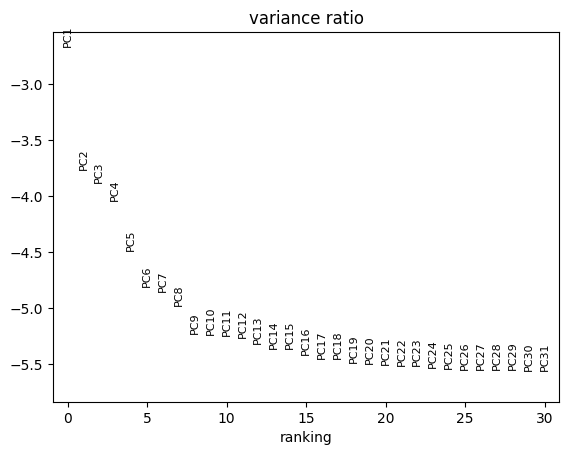

In [23]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_nuclei, log=True)

In [24]:
adata_nuclei

AnnData object with n_obs × n_vars = 862045 × 280
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts'
    var: 'mean', 'std'
    uns: 'sopa_attrs', 'spatialdata_attrs', 'log1p', 'pca'
    obsm: 'spatial', 'tangram_pred', 'X_pca'
    varm: 'PCs'

In [25]:
# Group the PCs into a single AnnData object
X_nuc_pca = adata_nuclei.obsm["X_pca"][:, :10]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_nuc_pca /= np.sqrt(np.max(adata_nuclei.uns["pca"]["variance"]))

# Save obs
nuclei_obs_all = adata_nuclei.obs.copy()

In [26]:
# Check var of first PC for each table is 1
print(np.var(adata_nuclei.obsm["X_pca"][:, 0]))

0.99999875


In [27]:
# Have a look to all the PCs var in the combined data
print("Nuc:")
for i in range(10):
    print(f"PC {i} variance: {np.var(adata_nuclei.obsm['X_pca'][:, i])}")

Nuc:
PC 0 variance: 0.9999987483024597
PC 1 variance: 0.33534812927246094
PC 2 variance: 0.2985405921936035
PC 3 variance: 0.2543264925479889
PC 4 variance: 0.16181066632270813
PC 5 variance: 0.11786720901727676
PC 6 variance: 0.11293856799602509
PC 7 variance: 0.09965875744819641
PC 8 variance: 0.07746183127164841
PC 9 variance: 0.07665780931711197


In [28]:
# Clean memory
del adata_nuclei
gc.collect()

5274

##### Cyto :

In [29]:
adata_cyto = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cyto_{slide_id}.h5ad")

In [30]:
# Preprocess the data
sc.pp.normalize_total(adata_cyto, target_sum=1e4)
sc.pp.log1p(adata_cyto)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


In [31]:
# Scale each gene to unit variance. Clip values exceeding standard deviation 10.
sc.pp.scale(adata_cyto, max_value=10)

In [32]:
# Reduce the dimensionality of the data by running principal component analysis (PCA), which reveals the main axes of variation and denoises the data.
sc.tl.pca(adata_cyto, svd_solver="arpack", use_highly_variable=False)

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:385: FutureWarning: Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None
  warn(msg, FutureWarning)


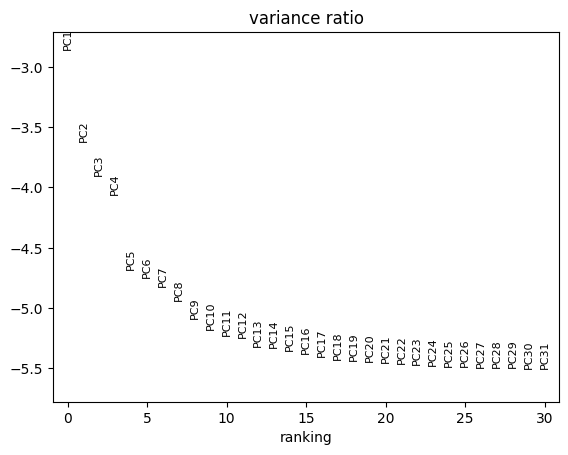

In [33]:
# Contribution of single PCs to the total variance in the data
# This gives us information about how many PCs we should consider in order to compute the neighborhood relations of cells, e.g. used in the clustering function  `sc.tl.louvain()` or tSNE `sc.tl.tsne()`
sc.pl.pca_variance_ratio(adata_cyto, log=True)

In [34]:
adata_cyto

AnnData object with n_obs × n_vars = 862045 × 280
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'region'
    var: 'gene_ids', 'feature_types', 'genome', 'mean', 'std'
    uns: 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [35]:
# Group the PCs into a single AnnData object
X_cyto_pca = adata_cyto.obsm["X_pca"][:, :13]

# As in MFA, divide the PCs by the square root of the maximal eigenvalue for each dataset separately
X_cyto_pca /= np.sqrt(np.max(adata_cyto.uns["pca"]["variance"]))

# Check that obs_names align
assert np.array_equal(nuclei_obs_all['cell_id'].values, adata_cyto.obs['cell_id'].values), "Cell IDs do not match"

# Concatenate along columns (features) and keep only informative PCs
X_combined = np.concatenate([X_nuc_pca, X_cyto_pca], axis=1)

# Create a new AnnData to store these fused PCs
adata_combined = ad.AnnData(X=X_combined, obs=nuclei_obs_all.copy())

# Name the columns
adata_combined.var_names = [f"PC_nuc_{i}" for i in range(len(X_nuc_pca[0]))] + [f"PC_cyto_{i}" for i in range(len(X_cyto_pca[0]))]

In [36]:
# Check var of first PC for each table is 1
print(np.var(adata_cyto.obsm["X_pca"][:, 0]))

0.99999887


In [37]:
# Have a look to all the PCs var in the combined data
print("Cyto:")
for i in range(13):
    print(f"PC {i} variance: {np.var(adata_cyto.obsm['X_pca'][:, i])}")

Cyto:
PC 0 variance: 0.9999988675117493
PC 1 variance: 0.46604305505752563
PC 2 variance: 0.35005077719688416
PC 3 variance: 0.2998174726963043
PC 4 variance: 0.16112522780895233
PC 5 variance: 0.150740385055542
PC 6 variance: 0.1394272893667221
PC 7 variance: 0.12402359396219254
PC 8 variance: 0.10761445760726929
PC 9 variance: 0.09783480316400528
PC 10 variance: 0.09302422404289246
PC 11 variance: 0.09150876104831696
PC 12 variance: 0.08518998324871063


In [38]:
# Clean memory
del adata_cyto
gc.collect()

5219

In [39]:
# Add final labels coming from table nuclei and table cells

adata_combined.obs['transcript_cat'] = adata_combined.obs['cell_id'].map(cellid2transcript_cat).fillna('Unknown')

adata_combined.obs['final_label_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')
adata_combined.obs['final_label_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')

adata_combined.obs['label1_nuclei'] = adata_combined.obs['cell_id'].map(cellid2nucleilabel1).fillna('Unknown')
adata_combined.obs['label1_cells'] = adata_combined.obs['cell_id'].map(cellid2celllabel1).fillna('Unknown')

adata_combined.obs

region   slide     cell_id        area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1   29.508303   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1   28.244812   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1    7.202566   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1   50.282740   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1   56.647940   
...                        ...     ...         ...         ...   
aaankacb-1  nucleus_boundaries  morpho  aaankacb-1   16.167266   
aaankacc-1  nucleus_boundaries  morpho  aaankacc-1   35.423439   
aaankacd-1  nucleus_boundaries  morpho  aaankacd-1  127.343219   
aaankace-1  nucleus_boundaries  morpho  aaankace-1   10.049029   
aaankacf-1  nucleus_boundaries  morpho  aaankacf-1   28.922869   

                                        ct_tangram  transcript_counts  \
aaaaaaaa-1                                Monocyte                 37   
aaaaaaab-1  CREB+MT1A+ vascular smooth muscle cell                 22   
aaaaaaac-1                           M1 macrophage                  6   
aaaaaaad-1      SCGB3A1 mammary luminal progenitor                 47   
aaaaaaae-1                       CCL19/21 pericyte                 42   
...                                            ...                ...   
aaankacb-1                          Dendritic cell                  7   
aaankacc-1                          Dendritic cell                  1   
aaankacd-1                KRT6B mammary basal cell                 61   
aaankace-1                          Dendritic cell                  5   
aaankacf-1                             Arterial EC                 13   

            transcript_cat        final_label_nuclei  \
aaaaaaaa-1               4  Fibroblast_Myofibroblast   
aaaaaaab-1               1  Fibroblast_Myofibroblast   
aaaaaaac-1               0                    Less10   
aaaaaaad-1               3                   Myeloid   
aaaaaaae-1               4  Fibroblast_Myofibroblast   
...                    ...                       ...   
aaankacb-1               0                    Less10   
aaankacc-1               1                    Less10   
aaankacd-1               3                Epithelial   
aaankace-1               0                    Less10   
aaankacf-1               1  Fibroblast_Myofibroblast   

                   final_label_cells label1_nuclei              label1_cells  
aaaaaaaa-1  Fibroblast_Myofibroblast    Fibroblast  Fibroblast/Myofibroblast  
aaaaaaab-1  Fibroblast_Myofibroblast    Fibroblast  Fibroblast/Myofibroblast  
aaaaaaac-1  Fibroblast_Myofibroblast        less10  Fibroblast/Myofibroblast  
aaaaaaad-1                   Myeloid          Mast                      Mast  
aaaaaaae-1  Fibroblast_Myofibroblast    Fibroblast  Fibroblast/Myofibroblast  
...                              ...           ...                       ...  
aaankacb-1                Epithelial        less10                Epithelial  
aaankacc-1                Epithelial        less10                Epithelial  
aaankacd-1                Epithelial    Epithelial                Epithelial  
aaankace-1                Epithelial        less10                Epithelial  
aaankacf-1  Fibroblast_Myofibroblast    Fibroblast  Fibroblast/Myofibroblast  

[862045 rows x 11 columns]

In [40]:
adata_combined

AnnData object with n_obs × n_vars = 862045 × 23
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'

In [41]:
adata_combined.var

Empty DataFrame
Columns: []
Index: [PC_nuc_0, PC_nuc_1, PC_nuc_2, PC_nuc_3, PC_nuc_4, PC_nuc_5, PC_nuc_6, PC_nuc_7, PC_nuc_8, PC_nuc_9, PC_cyto_0, PC_cyto_1, PC_cyto_2, PC_cyto_3, PC_cyto_4, PC_cyto_5, PC_cyto_6, PC_cyto_7, PC_cyto_8, PC_cyto_9, PC_cyto_10, PC_cyto_11, PC_cyto_12]

## 4. PCA on the two separated PCA (late fusion) + Clustering

In [42]:
# Run a "second PCA" on the scaled features
# No scaling because we already scaled using the maximum eigenvalue for each table
sc.tl.pca(adata_combined)

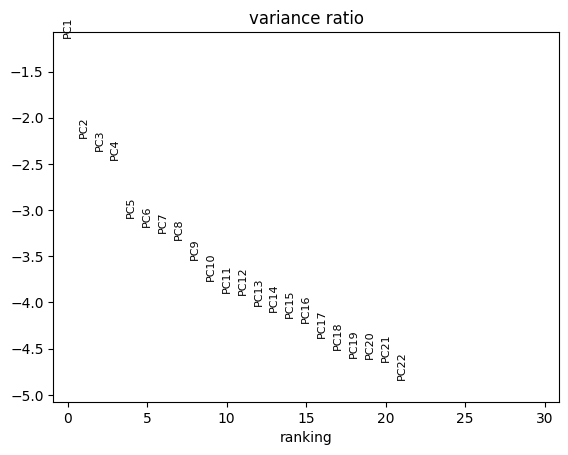

In [43]:
sc.pl.pca_variance_ratio(adata_combined, log=True)

In [44]:
adata_combined

AnnData object with n_obs × n_vars = 862045 × 23
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'
    uns: 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [45]:
# Neighborhood graph of cells using the PCA representation of the data matrix
sc.pp.neighbors(adata_combined, n_neighbors=10, n_pcs=22, use_rep="X_pca", key_added='pca_n10_pcs22')
# Embedding the neighborhood graph using UMAP
sc.tl.umap(adata_combined, neighbors_key='pca_n10_pcs22')
# Leiden clustering directly clusters the neighborhood graph of cells
sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs22_leiden_res0.4', neighbors_key='pca_n10_pcs22')
sc.tl.leiden(adata_combined, resolution=0.6, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs22_leiden_res0.6', neighbors_key='pca_n10_pcs22')
sc.tl.leiden(adata_combined, resolution=0.8, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs22_leiden_res0.8', neighbors_key='pca_n10_pcs22')

/Users/felicie-giraud-sauveur/miniforge3/envs/cluster/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_48973/59030777.py:6: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_combined, resolution=0.4, random_state=0, n_iterations=2, directed=False, key_added='pca_n10_pcs22_leiden_res0.4', neighbors_key='pca_n10_pcs22')


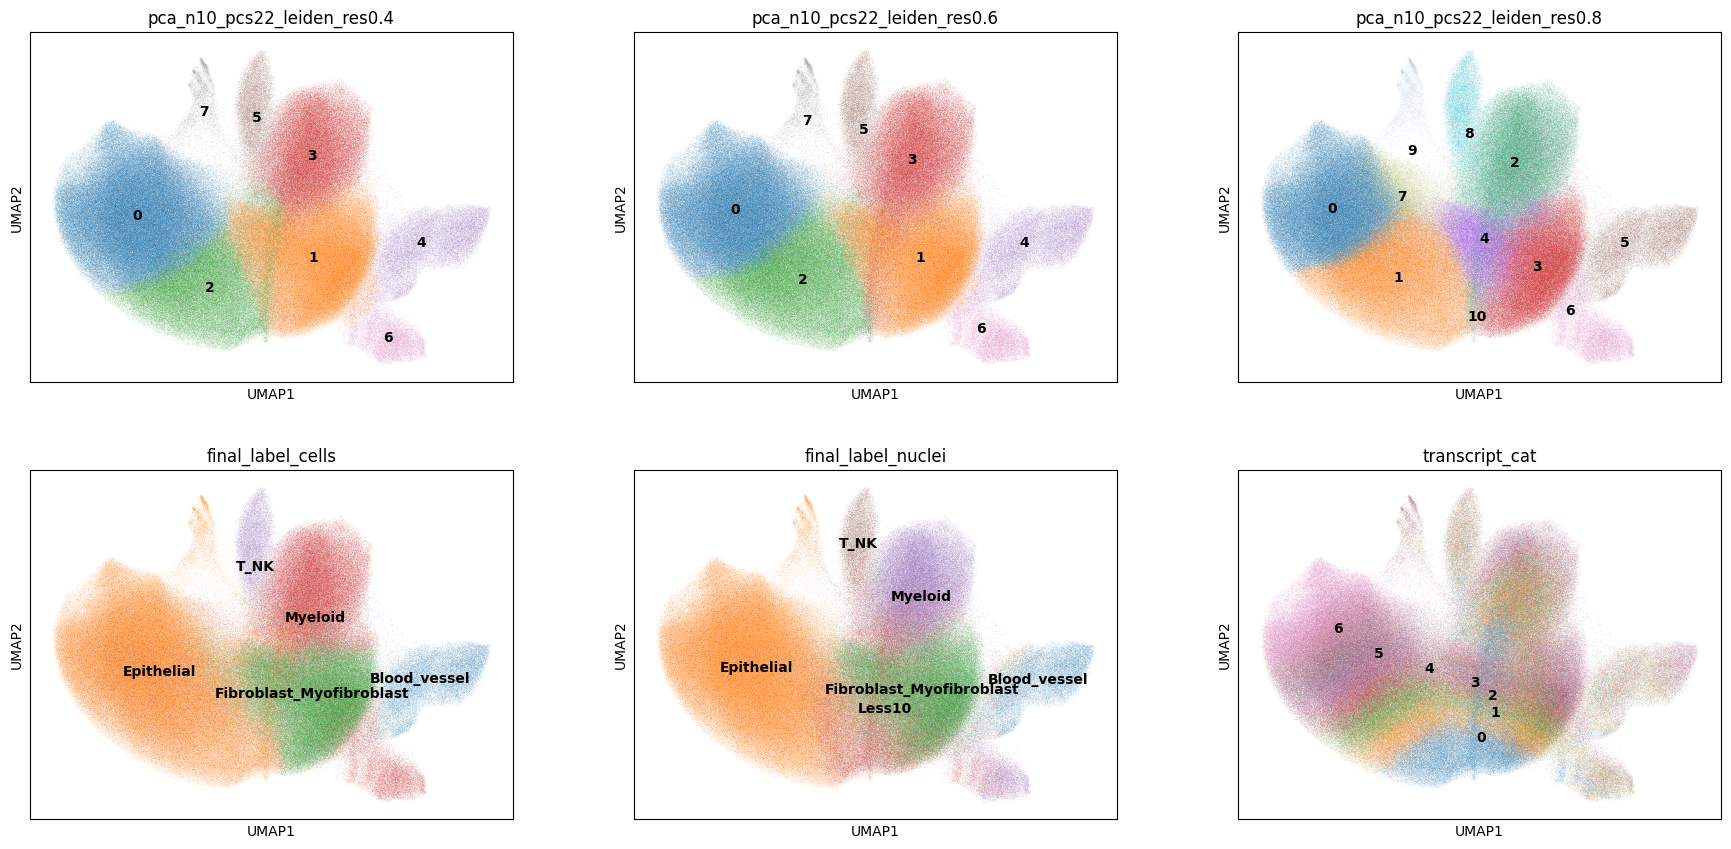

In [46]:
# Plot the clusters
adata_combined.obs['transcript_cat'] = pd.Categorical(adata_combined.obs['transcript_cat'])
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs22',
           color=['pca_n10_pcs22_leiden_res0.4', 'pca_n10_pcs22_leiden_res0.6', 'pca_n10_pcs22_leiden_res0.8', 'final_label_cells', 'final_label_nuclei', 'transcript_cat'],
           ncols=3, legend_loc='on data')

In [47]:
clustering_label = 'pca_n10_pcs22_leiden_res0.6'

In [48]:
adata_cells = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_cells_{slide_id}.h5ad")

In [49]:
# Put the clustering_label into the adata_cells to be able to use marker genes, and also final_label_cells and final_label_nuclei
cellid2clustering_label = dict(adata_combined.obs[['cell_id', clustering_label]].values)
adata_cells.obs["cluster_combined"] = adata_cells.obs['cell_id'].map(cellid2clustering_label).fillna('Unknown')
adata_cells.obs["final_label_cells"] = adata_cells.obs['cell_id'].map(cellid2celllabel).fillna('Unknown')
adata_cells.obs["final_label_nuclei"] = adata_cells.obs['cell_id'].map(cellid2nucleilabel).fillna('Unknown')


# Preprocess the adata_cells
sc.pp.normalize_total(adata_cells, target_sum=1e4)
sc.pp.log1p(adata_cells)

# Add X_umap to adata_cells, checking before cell_id alignment
assert np.array_equal(adata_cells.obs['cell_id'].values, adata_combined.obs['cell_id'].values), "Cell IDs do not match"
adata_cells.obsm['X_umap'] = adata_combined.obsm['X_umap']

# Wilcoxon rank-sum (Mann-Whitney-U) test. 
# You might also consider much more powerful differential testing packages like MAST, limma, DESeq2 and, for python, the recent diffxpy.
sc.tl.rank_genes_groups(adata_cells, "cluster_combined", method="wilcoxon", corr_method="benjamini-hochberg", key_added="rank_genes_"+"cluster_combined")
# The top ranked genes per cluster
top_ranked_genes = pd.DataFrame(adata_cells.uns["rank_genes_"+"cluster_combined"]["names"]).iloc[:7, :]
list_genes = pd.concat([top_ranked_genes[col] for col in top_ranked_genes], ignore_index=True).tolist()

## 5. Analyze and get combined labels

### Helper functions

In [50]:
def analyze_clusters(adata, resolution_key):
    
    # Ensure the resolution key exists in obs
    if resolution_key not in adata.obs:
        raise ValueError(f"{resolution_key} not found in adata.obs.")
    
    # Group data by the specified clustering resolution
    cluster_groups = adata.obs.groupby(resolution_key)

    results = {}

    for cluster_id, group in cluster_groups:
        
        # Calculate dominant labels for final_label_cells
        label_cells_counts = group['final_label_cells'].value_counts(normalize=True)
        dominant_cells = label_cells_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for cells
        label1_cells_counts = group['label1_cells'].value_counts(normalize=True)
        top1_cells = label1_cells_counts.head(1) * 100

        # Calculate dominant labels for final_label_nuclei
        label_nuclei_counts = group['final_label_nuclei'].value_counts(normalize=True)
        dominant_nuclei = label_nuclei_counts.head(2) * 100  # Get top 2 labels as percentages

        # Calculate top1 for label1 for nuclei
        label1_nuclei_counts = group['label1_nuclei'].value_counts(normalize=True)
        top1_nuclei = label1_nuclei_counts.head(1) * 100
        if top1_nuclei.keys()[0] == 'less_10_rna':
            top1_nuclei = label1_nuclei_counts.head(2).tail(1) * 100
        
        # Align categories for comparison
        common_categories = group['final_label_cells'].cat.categories.union(group['final_label_nuclei'].cat.categories)
        group['final_label_cells'] = group['final_label_cells'].cat.set_categories(common_categories)
        group['final_label_nuclei'] = group['final_label_nuclei'].cat.set_categories(common_categories)

        # Count different labels between final_label_cells and final_label_nuclei
        total_cells = len(group)  # Total number of cells in the cluster
        differing_labels_count_woUnknown = ((group['final_label_cells'] != group['final_label_nuclei']) & (group['final_label_nuclei'] != 'Unknown')  & (group['final_label_nuclei'] != 'Less10')).sum() / total_cells * 100
        differing_labels_count = (group['final_label_cells'] != group['final_label_nuclei']).sum() / total_cells * 100

        # Store the results
        results[cluster_id] = (dominant_cells.to_dict(), dominant_nuclei.to_dict(), top1_cells.to_dict(), top1_nuclei.to_dict(), differing_labels_count_woUnknown, differing_labels_count)

    return results

In [51]:
def analyze_cluster_dominance(cluster_analysis_results):
    
    clusters_unknown_cells = []
    clusters_different_top1 = []
    clusters_high_diff = []

    for cluster_id, (dominant_cells, dominant_nuclei, label1_cells, label1_nuclei, diff_percentage_woUnknown, _) in cluster_analysis_results.items():
        
        # Check if top 1 dominant_cells is 'Unknown' or 'Less10'
        
        top1_dominant_cells = max(dominant_cells, key=dominant_cells.get)
        if top1_dominant_cells == 'Unknown' or top1_dominant_cells == 'Less10':
            clusters_unknown_cells.append(cluster_id)
        
        # Check if top 1 for dominant_cells is different from dominant_nuclei
        
        top1_dominant_nuclei = max(dominant_nuclei, key=dominant_nuclei.get)

        if top1_dominant_nuclei == 'Unknown' or top1_dominant_nuclei == 'Less10':
            sorted_nuclei = sorted(dominant_nuclei.items(), key=lambda x: x[1], reverse=True)
            if len(sorted_nuclei) > 1:  # Make sure there's a second element
                top1_dominant_nuclei = sorted_nuclei[1][0]

        if top1_dominant_cells != top1_dominant_nuclei:
            clusters_different_top1.append(cluster_id)
        
        # Check if diff_percentage_woUnknown is greater than 40%
        
        if diff_percentage_woUnknown > 40:
            clusters_high_diff.append(cluster_id)

    print(f"Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': {clusters_unknown_cells}")
    print(f"Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): {clusters_different_top1}")
    print(f"Clusters where diff_percentage_woUnknown is greater than 40%: {clusters_high_diff}")

    print("=" * 50)

    clusters_to_analyse = set(clusters_unknown_cells + clusters_different_top1 + clusters_high_diff)
    for cluster_id in clusters_to_analyse:
        print(f"\nCluster ID: {cluster_id}")
        print(f"Dominant final_label_cells: {cluster_analysis_results[cluster_id][0]} - with dominant label1: {cluster_analysis_results[cluster_id][2]}")
        print(f"Dominant final_label_nuclei: {cluster_analysis_results[cluster_id][1]} - with dominant label1: {cluster_analysis_results[cluster_id][3]}")
        print(f"Count of differing labels without 'Unknown' or 'Less10' label for Nuclei: {round(cluster_analysis_results[cluster_id][4], 2)} %")
        print(f"Count of differing labels: {round(cluster_analysis_results[cluster_id][5], 2)} %")
        print(f"% of cells in cluster: {round(len(adata_combined.obs[adata_combined.obs[clustering_label] == cluster_id]) / len(adata_combined.obs) * 100, 2)} %")
        print("-----")

In [52]:
def assign_final_labels(cluster_analysis_results, input_dict):
    
    dict_combined_labels = {}

    for cluster_id, (dominant_cells, _, _, _, _, _) in cluster_analysis_results.items():
        
        if cluster_id in input_dict:
            # Use the label from input_dict if cluster_id is in it
            dict_combined_labels[cluster_id] = input_dict[cluster_id]
        else:
            # Otherwise, use the dominant label from final_label_cells
            dict_combined_labels[cluster_id] = max(dominant_cells, key=dominant_cells.get)

    return dict_combined_labels

### Analysis

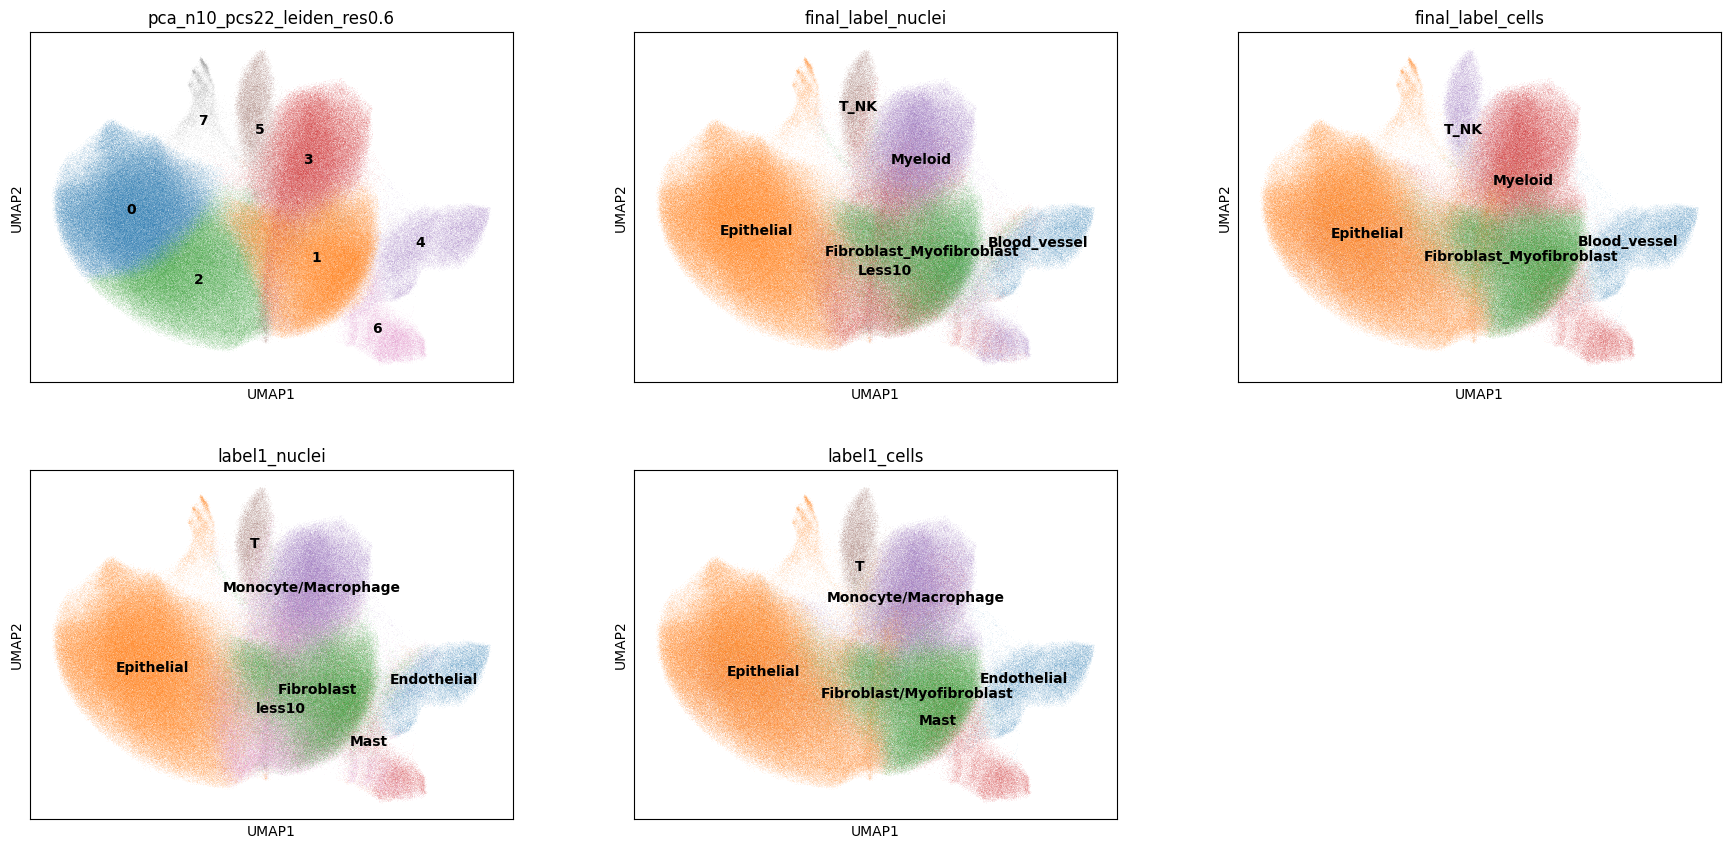

In [53]:
# Plot the clusters
sc.pl.umap(adata_combined, neighbors_key='pca_n10_pcs22',
           color=[clustering_label, 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells'],
           ncols=3, legend_loc='on data')

In [54]:
cluster_analysis_results = analyze_clusters(adata_combined, clustering_label)

for cluster_id, (dominant_cells, dominant_nuclei, _, _, diff_count_woUnknown, diff_count) in cluster_analysis_results.items():
    print("=" * 50)
    print(f"Cluster ID: {cluster_id}")
    print(f"Dominant final_label_cells: {dominant_cells}")
    print(f"Dominant final_label_nuclei: {dominant_nuclei}")
    print(f"Count of differing labels without 'Unknown/Less10' label for Nuclei: {round(diff_count_woUnknown, 2)} %")
    print(f"Count of differing labels: {round(diff_count, 2)} %\n")

Cluster ID: 0
Dominant final_label_cells: {'Epithelial': 95.30353928479589, 'Myeloid': 2.9180425563179355}
Dominant final_label_nuclei: {'Epithelial': 99.6632556848563, 'Fibroblast_Myofibroblast': 0.1514328980828024}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 4.82 %
Count of differing labels: 4.94 %

Cluster ID: 1
Dominant final_label_cells: {'Fibroblast_Myofibroblast': 80.38494224900529, 'Myeloid': 13.887279329393131}
Dominant final_label_nuclei: {'Fibroblast_Myofibroblast': 77.88610113184224, 'Less10': 14.012824970062193}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 17.52 %
Count of differing labels: 31.53 %

Cluster ID: 2
Dominant final_label_cells: {'Epithelial': 87.53694293557619, 'Myeloid': 5.526546346591905}
Dominant final_label_nuclei: {'Epithelial': 78.57309736580808, 'Less10': 16.96104199521056}
Count of differing labels without 'Unknown/Less10' label for Nuclei: 12.69 %
Count of differing labels: 29.65 %

Cluster ID: 3
Domina

/var/folders/ff/llzyqd_s78v1k8vywvjxp5_r0000gn/T/ipykernel_48973/1125182952.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_groups = adata.obs.groupby(resolution_key)


In [55]:
analyze_cluster_dominance(cluster_analysis_results)

Clusters where the top 1 for dominant_cells is 'Unknown' or 'Less10': []
Clusters where the top 1 for dominant_cells differs from dominant_nuclei (excluding 'Unknown' and 'Less10'): []
Clusters where diff_percentage_woUnknown is greater than 40%: []


In [56]:
dict_combined_labels = assign_final_labels(cluster_analysis_results, {})
dict_combined_labels

{'0': 'Epithelial',
 '1': 'Fibroblast_Myofibroblast',
 '2': 'Epithelial',
 '3': 'Myeloid',
 '4': 'Blood_vessel',
 '5': 'T_NK',
 '6': 'Myeloid',
 '7': 'Epithelial'}

In [57]:
adata_combined.obs['final_label_combined'] = adata_combined.obs[clustering_label].map(dict_combined_labels)
adata_combined.obs

region   slide     cell_id        area  \
aaaaaaaa-1  nucleus_boundaries  morpho  aaaaaaaa-1   29.508303   
aaaaaaab-1  nucleus_boundaries  morpho  aaaaaaab-1   28.244812   
aaaaaaac-1  nucleus_boundaries  morpho  aaaaaaac-1    7.202566   
aaaaaaad-1  nucleus_boundaries  morpho  aaaaaaad-1   50.282740   
aaaaaaae-1  nucleus_boundaries  morpho  aaaaaaae-1   56.647940   
...                        ...     ...         ...         ...   
aaankacb-1  nucleus_boundaries  morpho  aaankacb-1   16.167266   
aaankacc-1  nucleus_boundaries  morpho  aaankacc-1   35.423439   
aaankacd-1  nucleus_boundaries  morpho  aaankacd-1  127.343219   
aaankace-1  nucleus_boundaries  morpho  aaankace-1   10.049029   
aaankacf-1  nucleus_boundaries  morpho  aaankacf-1   28.922869   

                                        ct_tangram  transcript_counts  \
aaaaaaaa-1                                Monocyte                 37   
aaaaaaab-1  CREB+MT1A+ vascular smooth muscle cell                 22   
aaaaaaac-1                           M1 macrophage                  6   
aaaaaaad-1      SCGB3A1 mammary luminal progenitor                 47   
aaaaaaae-1                       CCL19/21 pericyte                 42   
...                                            ...                ...   
aaankacb-1                          Dendritic cell                  7   
aaankacc-1                          Dendritic cell                  1   
aaankacd-1                KRT6B mammary basal cell                 61   
aaankace-1                          Dendritic cell                  5   
aaankacf-1                             Arterial EC                 13   

           transcript_cat        final_label_nuclei         final_label_cells  \
aaaaaaaa-1              4  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   
aaaaaaab-1              1  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   
aaaaaaac-1              0                    Less10  Fibroblast_Myofibroblast   
aaaaaaad-1              3                   Myeloid                   Myeloid   
aaaaaaae-1              4  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   
...                   ...                       ...                       ...   
aaankacb-1              0                    Less10                Epithelial   
aaankacc-1              1                    Less10                Epithelial   
aaankacd-1              3                Epithelial                Epithelial   
aaankace-1              0                    Less10                Epithelial   
aaankacf-1              1  Fibroblast_Myofibroblast  Fibroblast_Myofibroblast   

           label1_nuclei              label1_cells  \
aaaaaaaa-1    Fibroblast  Fibroblast/Myofibroblast   
aaaaaaab-1    Fibroblast  Fibroblast/Myofibroblast   
aaaaaaac-1        less10  Fibroblast/Myofibroblast   
aaaaaaad-1          Mast                      Mast   
aaaaaaae-1    Fibroblast  Fibroblast/Myofibroblast   
...                  ...                       ...   
aaankacb-1        less10                Epithelial   
aaankacc-1        less10                Epithelial   
aaankacd-1    Epithelial                Epithelial   
aaankace-1        less10                Epithelial   
aaankacf-1    Fibroblast  Fibroblast/Myofibroblast   

           pca_n10_pcs22_leiden_res0.4 pca_n10_pcs22_leiden_res0.6  \
aaaaaaaa-1                           1                           1   
aaaaaaab-1                           1                           1   
aaaaaaac-1                           1                           1   
aaaaaaad-1                           1                           1   
aaaaaaae-1                           1                           1   
...                                ...                         ...   
aaankacb-1                           2                           2   
aaankacc-1                           2                           2   
aaankacd-1                           0                           0   
aaankace-1                      

In [58]:
adata_combined.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  426186
Fibroblast_Myofibroblast    207096
Myeloid                     163418
Blood_vessel                 37451
T_NK                         27894
Name: count, dtype: int64

In [59]:
# Create final table, adding cell_id with less than 10 transcripts

adata_nuclei_ini = sc.read_h5ad(f"/Users/felicie-giraud-sauveur/Documents/HE2CellType/adata_TEMP/adata_nuclei_ini_{slide_id}.h5ad")

adata_combined_missing = adata_nuclei_ini[~adata_nuclei_ini.obs_names.isin(adata_combined.obs_names)].copy()
adata_combined_missing.obs['final_label_combined'] = 'Less10'
adata_combined_missing.obs['final_label_nuclei'] = 'Less10'
adata_combined_missing.obs['final_label_cells'] = 'Less10'
print(adata_combined.shape[0] + adata_combined_missing.shape[0])

adata_combined_all = ad.concat([adata_combined, adata_combined_missing], join="outer", merge="first", uns_merge="first", pairwise=True)
print(adata_combined_all.shape[0])

892966
892966


In [60]:
# Clean memory
del adata_combined, adata_combined_missing, adata_nuclei_ini
gc.collect()

55421

In [61]:
adata_combined_all

AnnData object with n_obs × n_vars = 892966 × 564
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs22_leiden_res0.4', 'pca_n10_pcs22_leiden_res0.6', 'pca_n10_pcs22_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs22', 'umap', 'pca_n10_pcs22_leiden_res0.4', 'pca_n10_pcs22_leiden_res0.6', 'pca_n10_pcs22_leiden_res0.8', 'pca_n10_pcs22_leiden_res0.4_colors', 'pca_n10_pcs22_leiden_res0.6_colors', 'pca_n10_pcs22_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs22_distances', 'pca_n10_pcs22_connectivities'

In [62]:
adata_combined_all.obs['final_label_combined'].value_counts(dropna=False)

final_label_combined
Epithelial                  426186
Fibroblast_Myofibroblast    207096
Myeloid                     163418
Blood_vessel                 37451
Less10                       30921
T_NK                         27894
Name: count, dtype: int64

In [63]:
sdata_final = sd.read_zarr(f"/Volumes/DD_FGS/MICS/data_HE2CellType/CT_DS/sdata_final/sdata_{slide_id}.zarr", selection=('shapes',))

In [64]:
# Add in sdata final
sdata_final.tables['table_combined'] = adata_combined_all

In [65]:
adata_combined_all

AnnData object with n_obs × n_vars = 892966 × 564
    obs: 'region', 'slide', 'cell_id', 'area', 'ct_tangram', 'transcript_counts', 'transcript_cat', 'final_label_nuclei', 'final_label_cells', 'label1_nuclei', 'label1_cells', 'pca_n10_pcs22_leiden_res0.4', 'pca_n10_pcs22_leiden_res0.6', 'pca_n10_pcs22_leiden_res0.8', 'final_label_combined'
    uns: 'pca', 'pca_n10_pcs22', 'umap', 'pca_n10_pcs22_leiden_res0.4', 'pca_n10_pcs22_leiden_res0.6', 'pca_n10_pcs22_leiden_res0.8', 'pca_n10_pcs22_leiden_res0.4_colors', 'pca_n10_pcs22_leiden_res0.6_colors', 'pca_n10_pcs22_leiden_res0.8_colors', 'final_label_cells_colors', 'final_label_nuclei_colors', 'transcript_cat_colors', 'label1_nuclei_colors', 'label1_cells_colors', 'sopa_attrs', 'spatialdata_attrs'
    obsm: 'X_pca', 'X_umap', 'spatial', 'tangram_pred'
    varm: 'PCs'
    obsp: 'pca_n10_pcs22_distances', 'pca_n10_pcs22_connectivities'

In [66]:
# Convert in str the final_label_combined, final_label_cells and final_label_nuclei to see it in Napari
sdata_final.tables['table_combined'].obs['final_label_combined'] = sdata_final.tables['table_combined'].obs['final_label_combined'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_cells'] = sdata_final.tables['table_combined'].obs['final_label_cells'].astype(str)
sdata_final.tables['table_combined'].obs['final_label_nuclei'] = sdata_final.tables['table_combined'].obs['final_label_nuclei'].astype(str)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


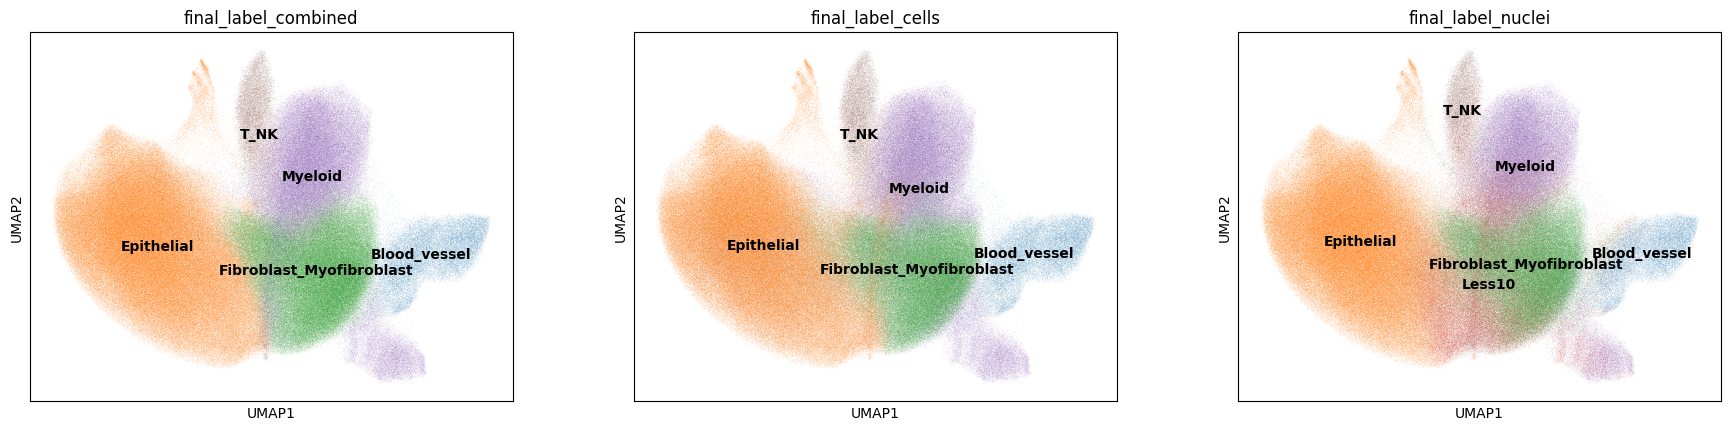

In [67]:
sc.pl.umap(sdata_final.tables['table_combined'], color=['final_label_combined', 'final_label_cells', 'final_label_nuclei'], ncols=3, legend_loc='on data')

In [68]:
# Put table_combined as annotating cell_boundaries

sdata_final["table_combined"].obs["region"] = "cell_boundaries"
sdata_final.tables["table_combined"].obs['region'] = sdata_final.tables["table_combined"].obs['region'].astype('category')
sdata_final.set_table_annotates_spatialelement(table_name="table_combined", region="cell_boundaries", region_key="region", instance_key="cell_id")

region, region_key, instance_key = get_table_keys(sdata_final["table_combined"])
print(region, region_key, instance_key)

cell_boundaries region cell_id


In [69]:
# Color for final label in Napari

to_hex = partial(colors.to_hex, keep_alpha=True)

# Normalize the RGB values to the range [0, 1] by dividing by 255
napari_color = {
                "T_NK": to_hex(to_rgba([255/255, 15/255, 15/255])[:3]),                      # Red
                "B_Plasma": to_hex(to_rgba([255/255, 143/255, 15/255])[:3]),                 # Orange
                "Myeloid": to_hex(to_rgba([255/255, 211/255, 15/255])[:3]),                  # Yellow
                "Blood_vessel": to_hex(to_rgba([70/255, 128/255, 0/255])[:3]),               # Dark Green
                "Fibroblast_Myofibroblast": to_hex(to_rgba([156/255, 255/255, 36/255])[:3]), # Light Green
                "Epithelial": to_hex(to_rgba([57/255, 208/255, 133/255])[:3]),               # Blue Green
                "Specialized": to_hex(to_rgba([69/255, 237/255, 255/255])[:3]),              # Turquoise
                "Melanocyte": to_hex(to_rgba([22/255, 169/255, 223/255])[:3]),               # Blue
                "Stem_like": to_hex(to_rgba([22/255, 69/255, 223/255])[:3]),                 # Dark Blue
                "Glioblastoma": to_hex(to_rgba([130/255, 55/255, 235/255])[:3]),             # Purple
                "Unknown": to_hex(to_rgba([0/255, 0/255, 0/255])[:3]),                       # Black
                "Less10": to_hex(to_rgba([143/255, 143/255, 143/255])[:3])                   # Grey
                }

sdata_final.tables['table_combined'].uns["final_label_combined_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_cells_colors"] = napari_color
sdata_final.tables['table_combined'].uns["final_label_nuclei_colors"] = napari_color

In [70]:
sdata_final.write_element("table_combined")